In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## implementing linear regression from scratch

In [ ]:
# let us first build up our data with linear regression formula 
def generate_data():

  w = 0.7
  b = 0.3

  X = np.arange(0, 1, 0.02)

  Y = w * X + b

  train_split = int(0.8 * len(X)) # 80% of data for training
  x_train, y_train = X[:train_split], Y[:train_split]
  x_test, y_test = X[train_split:], Y[train_split:]
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = generate_data()

In [ ]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
  plt.figure(figsize=(8, 5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

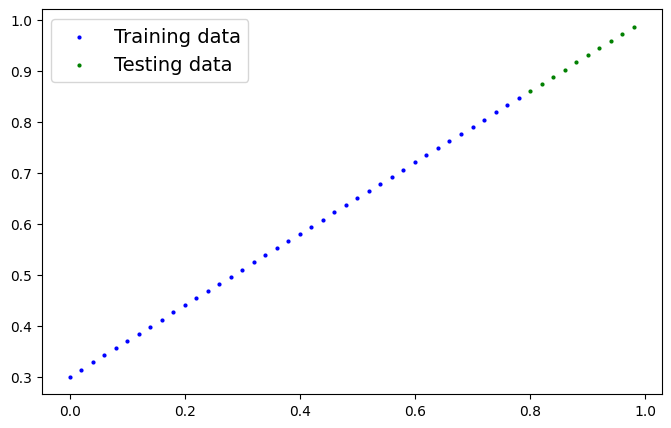

In [ ]:
plot_predictions()

In [ ]:
# implementing linear regression model
class linear_regression():

  def __init__(self, alpha, n):
    random.seed(42)
    self.alpha = alpha
    self.n = n
    self.w = random.random()
    self.b = random.random()

  def fit(self, x, y):
    y_hat = self.w * x + self.b

    for i in range(self.n):
      dw = (1/self.n) * np.dot(x, y_hat - y)
      db = (1/self.n) * np.sum(y_hat - y)
      self.w -= self.alpha * dw
      self.b -= self.alpha * db

  def predict(self, x):
    return self.w * x + self.b

  def MSE(self, y, y_hat):
    return np.mean((y - y_hat)**2)

In [ ]:
model = linear_regression(0.02, 10000)
model.w, model.b

(0.6394267984578837, 0.025010755222666936)

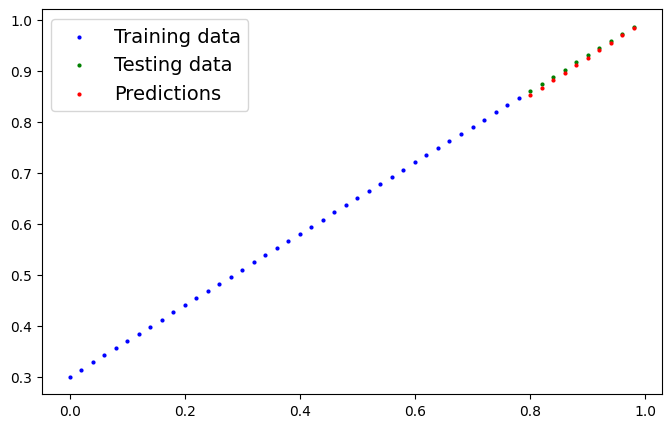

In [ ]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)
plot_predictions(predictions = predictions)

In [ ]:
# model parameters 
print(f"weight : {model.w} bias : {model.b}")

weight : 0.7351768313058914 bias : 0.2639009899256855


In [ ]:
# calculating mean squared error for our model
model.MSE(y_test, predictions)

2.7043171309618416e-05

## implementing linear regression with scikit learn

In [ ]:
x_train, x_test, y_train, y_test = generate_data()
x_train, x_test, y_train, y_test = x_train.reshape(-1, 1), x_test.reshape(-1, 1), y_train.reshape(-1,1), y_test.reshape(-1,1)
model1 = LinearRegression()
model1.fit(x_train, y_train)
model1.score(x_test, y_test) # R-squared

1.0

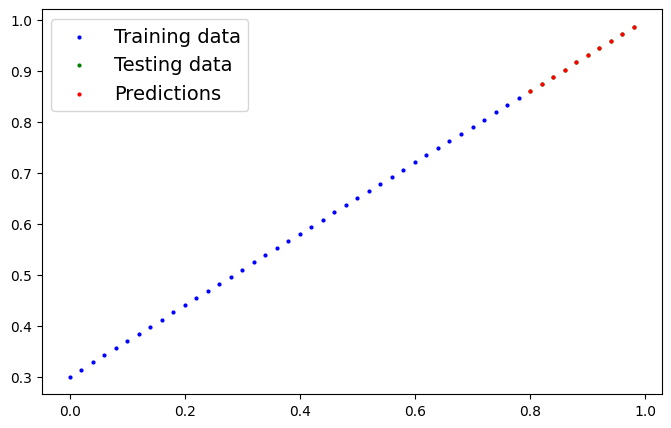

In [ ]:
predictions = model1.predict(x_test)
plot_predictions(predictions = predictions)

In [ ]:
mse = mean_squared_error(y_true=y_test,y_pred=predictions)
mse

9.860761315262648e-33

## implementing linear regression with normal equation as the training algorithm

In [ ]:
# geting data
x_train, x_test, y_trian, y_test = generate_data()

## The formula of normal equation
 $θ̂ = (X^{T} . X)^{-1} . X^{T}. y$

In [ ]:
from numpy.linalg import inv

In [ ]:
# linear regression with normal equation
class linear_regression_normal_equation():
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def normal(self, x):
    self.params = inv(x.T.dot(x)).dot(x.T).dot(self.y)
    return self.params
  
  def predict(self, x):
    return self.params[1][0] * x + self.params[0][0]

  def MSE(self, y, y_hat):
    return np.mean((y_hat - y) ** 2)

In [ ]:
model = linear_regression_normal_equation(x_train, y_train)

In [ ]:
X_b = np.c_[np.ones((40, 1)), x_train] # set bias term to 1 for each sample  

In [ ]:
model.normal(X_b)

array([[0.3],
       [0.7]])

In [ ]:
# model parameters 
print(f"weight : {model.params[1][0]} bias : {model.params[0][0]}")

weight : 0.7000000000000005 bias : 0.29999999999999993


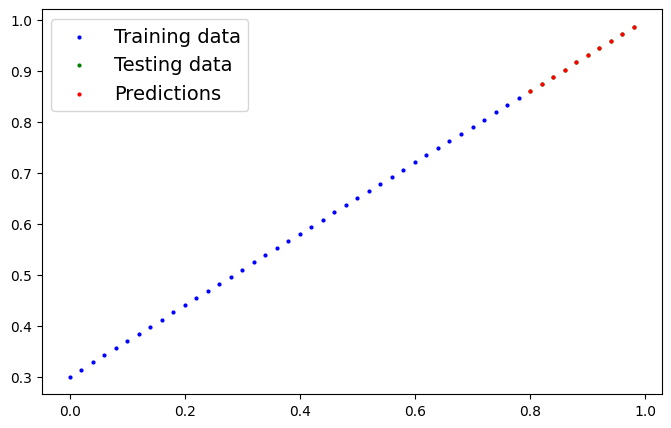

In [ ]:
# prediction 
predictions = model.predict(x_test)
plot_predictions(predictions = predictions)

In [ ]:
#calculatin MSE
model.MSE(y_test, predictions)

2.083085827849234e-31